In [1]:
import sklearn
from sklearn.linear_model import Ridge
import time
from scipy.io import loadmat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [26]:
raw = loadmat(r"C:\Users\parkf\Desktop\summer2021\eegData\for_Barry\282L.mat") #change this to try different one off files
X = raw['data']   #[0][0]['data'] #file format is different from ###L/R.mat vs the sample data
mask = raw['mask']
l = X.shape[0]
c = X.shape[1]

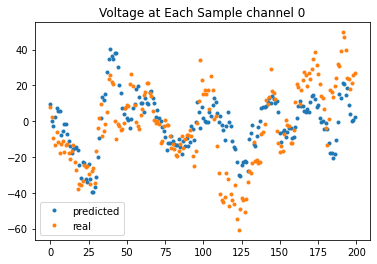

R2: 0.6079981643504463


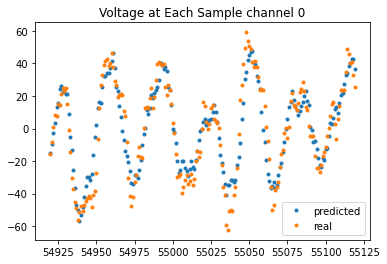

R2: 0.6562257670177833


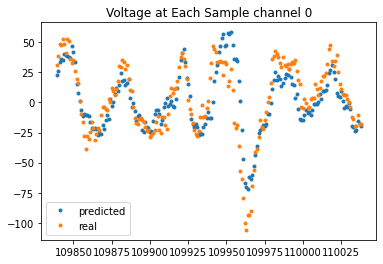

R2: 0.5038261510552517


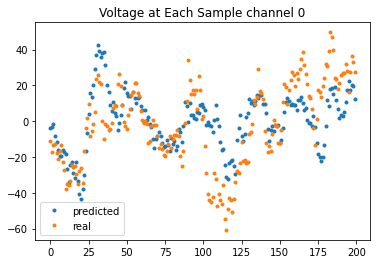

R2: 0.6155535036313675


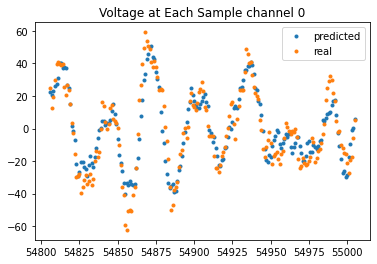

R2: 0.6651686600130797


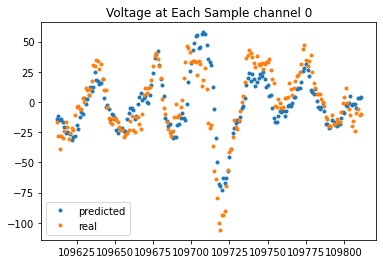

R2: 0.51140023906711


In [36]:
memVec = [4, 12]
ridgeVec = [.1]

cvNum = 3

s = (len(memVec), len(ridgeVec), c, cvNum)
error = np.zeros(s)
for memNumber in memVec:
    xClean = functionList.removeTrash(X, mask, memNumber)
    for regularizer in ridgeVec:         
        crossVal = sklearn.model_selection.KFold(n_splits=cvNum)
        for thisChannel in range(1): #range(c):
            xStrip = np.array(X) # IF YOU DONT SPECIFY THIS POINTERS OR SOMETHING WILL END UP AFFECTING X
            xStrip[:, thisChannel] = 0
            featureMat = functionList.buildFeatureMat(xStrip, memNumber)
            featureMat = functionList.removeTrash(featureMat, mask, memNumber)
            adjustedReg = regularizer*np.linalg.norm(xClean[:, thisChannel])
            cvRun = 0
            for train, test in crossVal.split(featureMat):

                RR = sklearn.linear_model.Ridge(alpha=adjustedReg)
                RR.fit(featureMat[train, :],xClean[train, thisChannel])
                pred = RR.predict(featureMat[test, :])

                err = functionList.findMSE(pred, xClean[test,thisChannel], 0, 1)
                error[memVec.index(memNumber), ridgeVec.index(regularizer), thisChannel, cvRun] = err
                cvRun = cvRun + 1

                testShow = np.array(test)
                start = 0
                stop = 200
                testShow = test[start:stop]
                plt.title(f"Voltage at Each Sample channel {thisChannel}")
                plt.plot(testShow, pred[start:stop], ".", label = "predicted")
                plt.plot(testShow, xClean[testShow, thisChannel], ".", label = "real")
                plt.legend()
                plt.show()
                print(f"R2: {RR.score(featureMat[test, :], xClean[test, thisChannel])}")

errNoCv = np.mean(error,3)